In [1]:
#https://universe.roboflow.com/robo-nlrfk/simunreal/dataset/3#
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BIe4VvXSyIINFCUTvRC5")
project = rf.workspace("robo-nlrfk").project("simunreal")
version = project.version(3)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to simUNREAL-3 in yolov9:: 100%|██████████| 1994/1994 [00:00<00:00, 4924.21it/s]


In [3]:
def text_to_file(text,file_path):
    with open(file_path,'w') as file:
        file.write(text)
text = """
names:
- obstacle
- person
- road
- walkable_terrain
- walkable_vegetation
nc: 5
roboflow:
  license: CC BY 4.0
  project: simunreal
  url: https://universe.roboflow.com/robo-nlrfk/simunreal/dataset/3
  version: 3
  workspace: robo-nlrfk
test: /kaggle/working/simUNREAL-3/test/images
train: /kaggle/working/simUNREAL-3/train/images
val: /kaggle/working/simUNREAL-3/valid/images
"""
text_to_file(text, "data.yaml")

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [6]:
# Train YOLOv9e-seg.pt on COCO8 for 18 epochs
!yolo task= segment mode= train data=/kaggle/working/data.yaml model=yolov9c-seg.pt epochs=18 imgsz=640

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/kaggle/working/data.yaml, epochs=18, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

In [7]:
!yolo task=segment mode=predict model=/kaggle/working/runs/segment/train/weights/best.pt imgsz=640 conf=0.5 source=/kaggle/working/simUNREAL-3/train/images

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c-seg summary (fused): 411 layers, 27,628,383 parameters, 0 gradients, 157.6 GFLOPs

image 1/867 /kaggle/working/simUNREAL-3/train/images/2024-10-31-10-14-29_mp4-0000_jpg.rf.8355d90a19b2edb6dfe0d781200d683f.jpg: 384x640 1 obstacle, 17 walkable_terrains, 25 walkable_vegetations, 57.5ms
image 2/867 /kaggle/working/simUNREAL-3/train/images/2024-10-31-10-14-29_mp4-0000_jpg.rf.beeac97aee88716ab721afe6277d0593.jpg: 384x640 13 walkable_terrains, 39 walkable_vegetations, 40.0ms
image 3/867 /kaggle/working/simUNREAL-3/train/images/2024-10-31-10-14-29_mp4-0000_jpg.rf.c804069cb9300f039c6843b97fc9a750.jpg: 384x640 1 road, 37 walkable_terrains, 48 walkable_vegetations, 39.9ms
image 4/867 /kaggle/working/simUNREAL-3/train/images/2024-10-31-10-14-29_mp4-0004_jpg.rf.2d4ad27ef61c39c51ab11db875542355.jpg: 384x640 48 walkable_terrains, 37 walkable_vegetations, 40.0ms
image 5/867 /kaggle/working/simUNREAL-3/train/images/2024

In [9]:
import glob
from IPython.display import Image, display

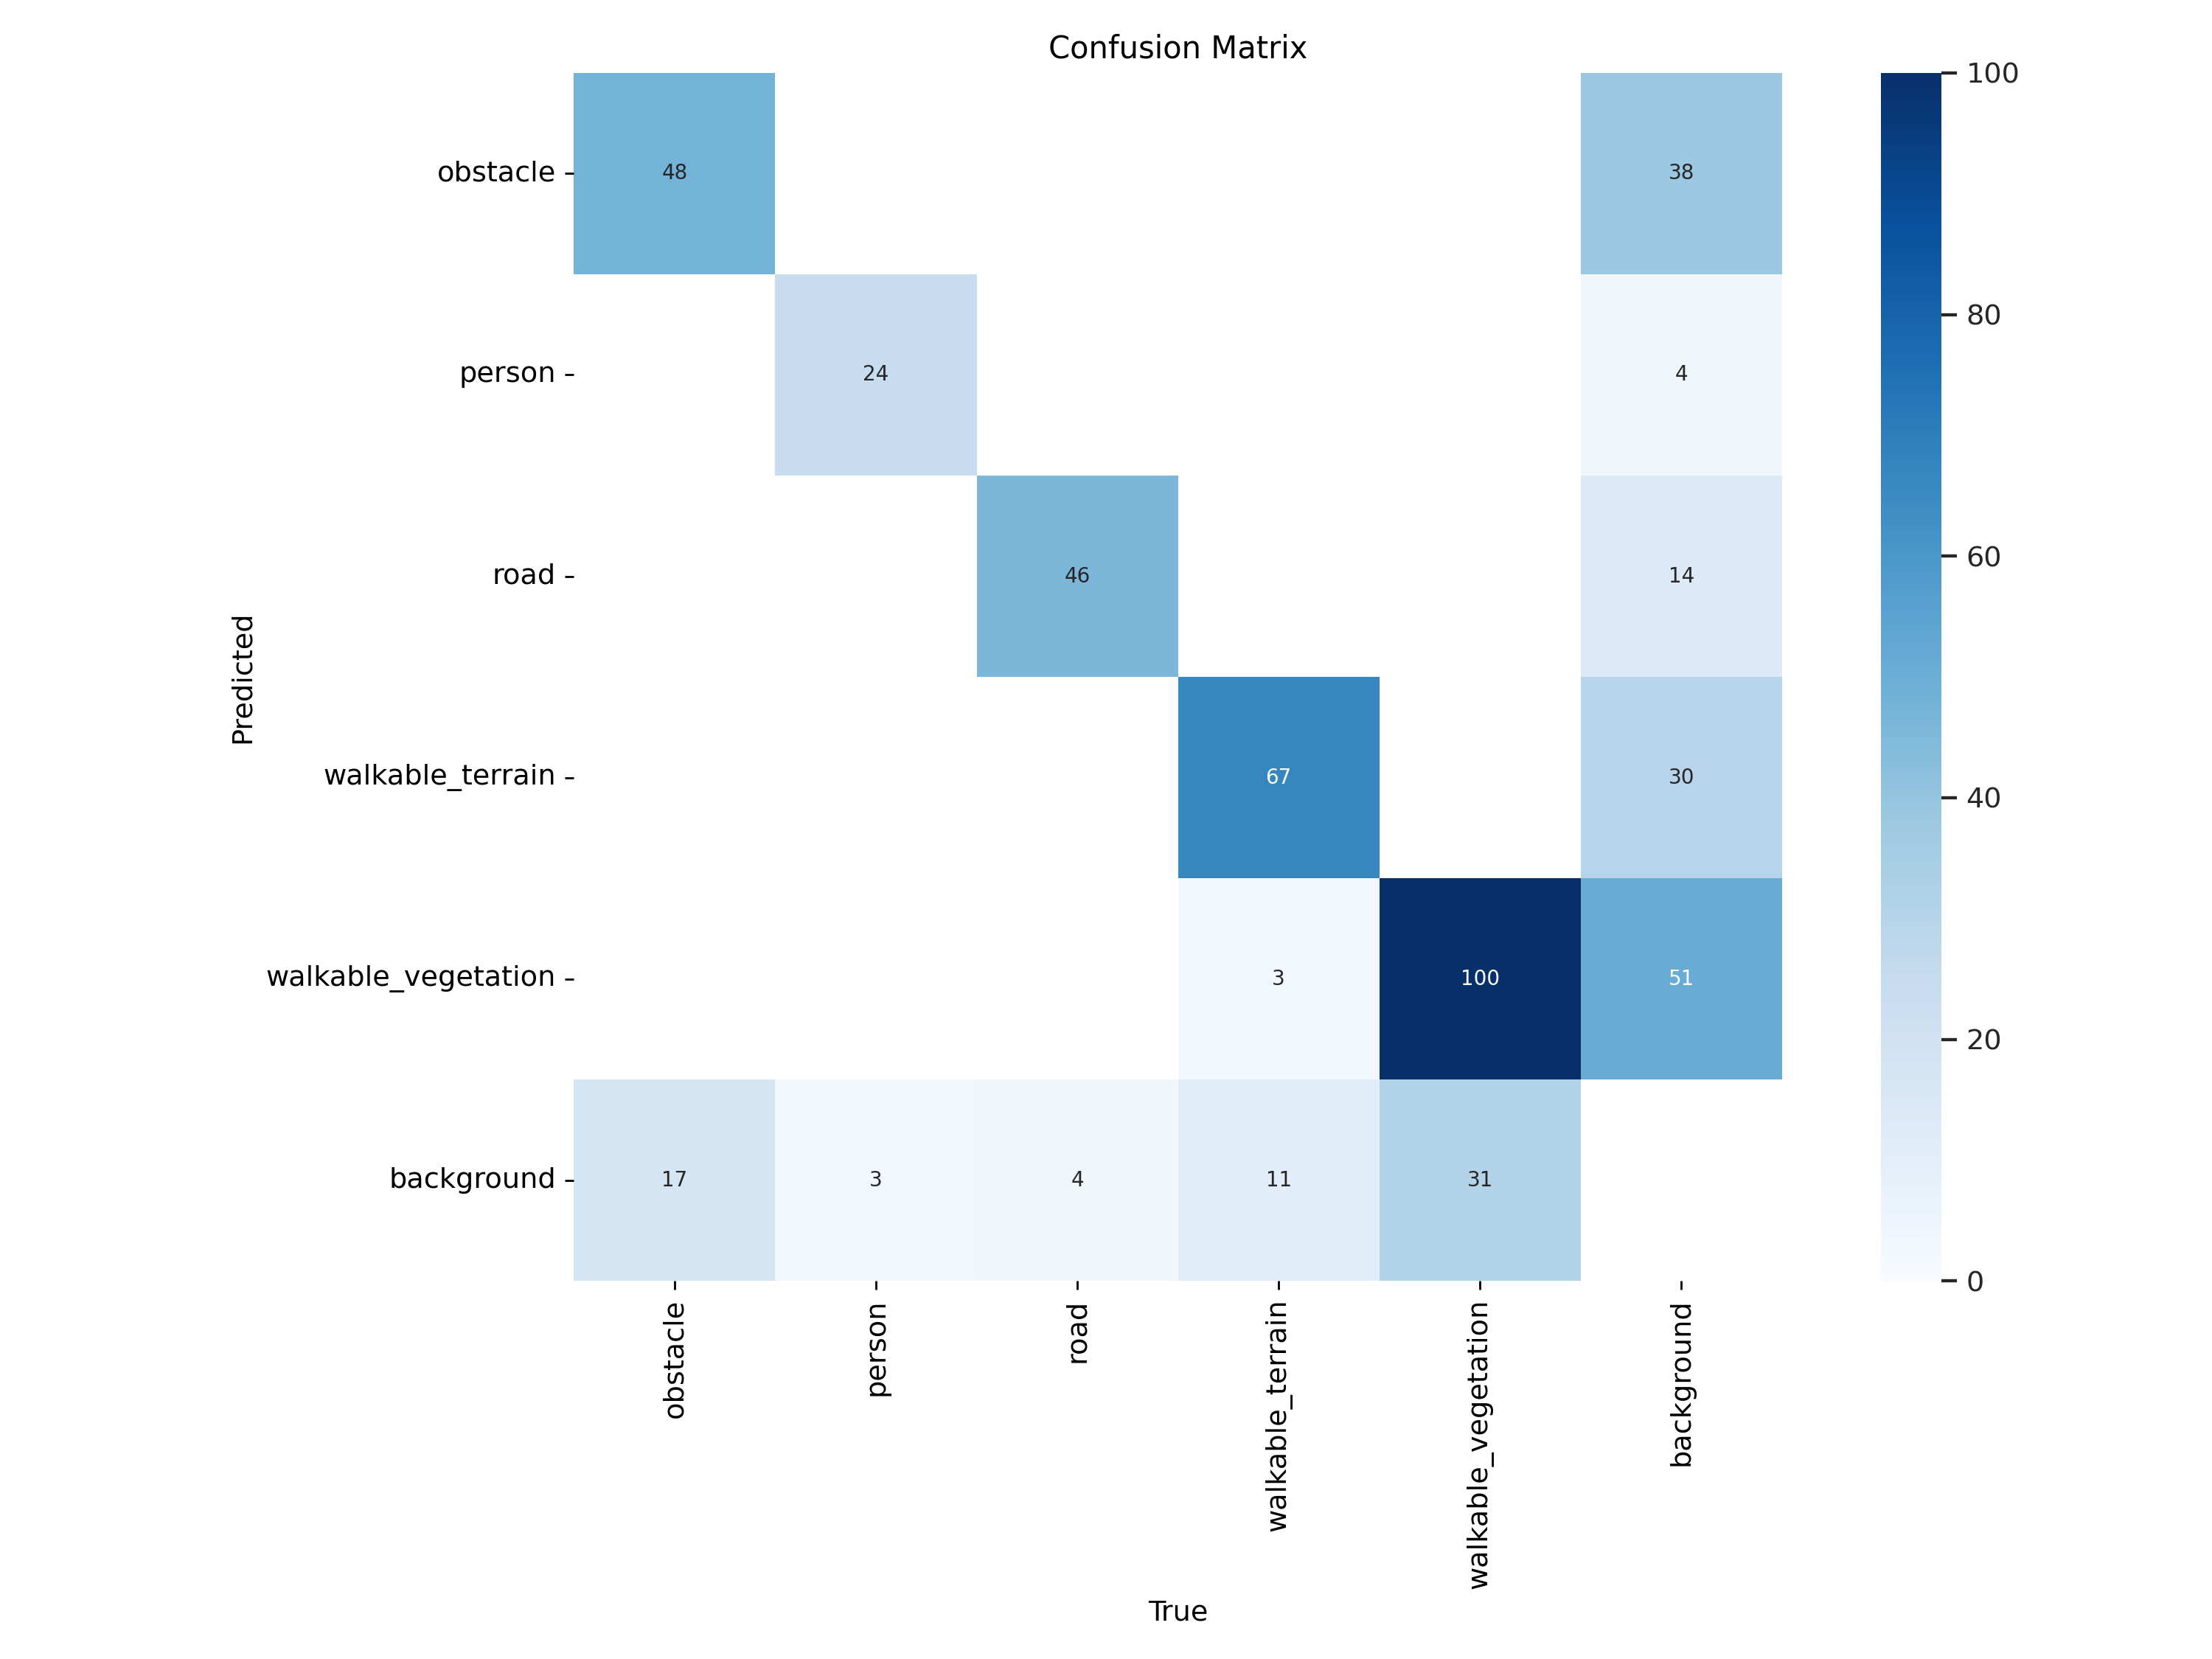

In [11]:
display(Image(filename='/kaggle/working/runs/segment/train2/confusion_matrix.png'))

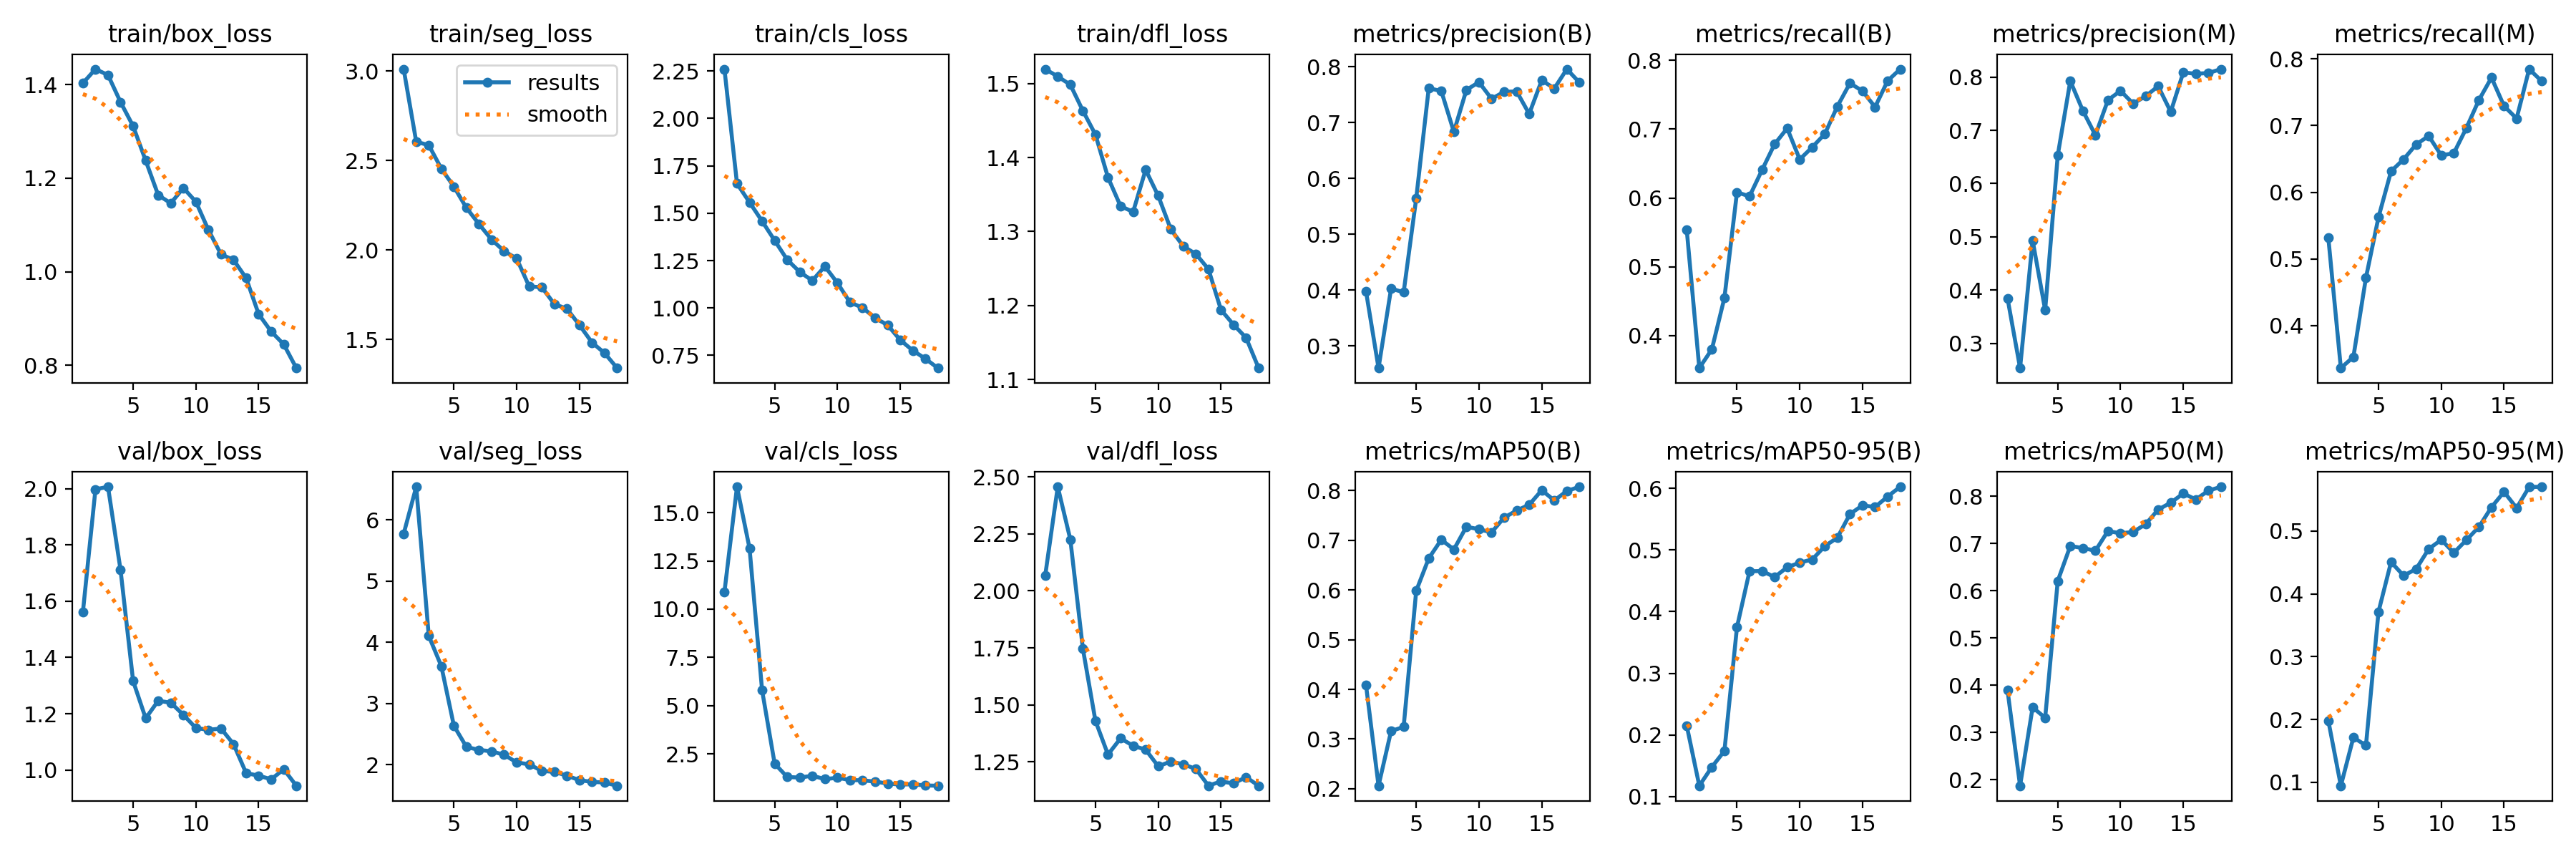

In [12]:
display(Image(filename=f"/kaggle/working/runs/segment/train2/results.png", width=1000))

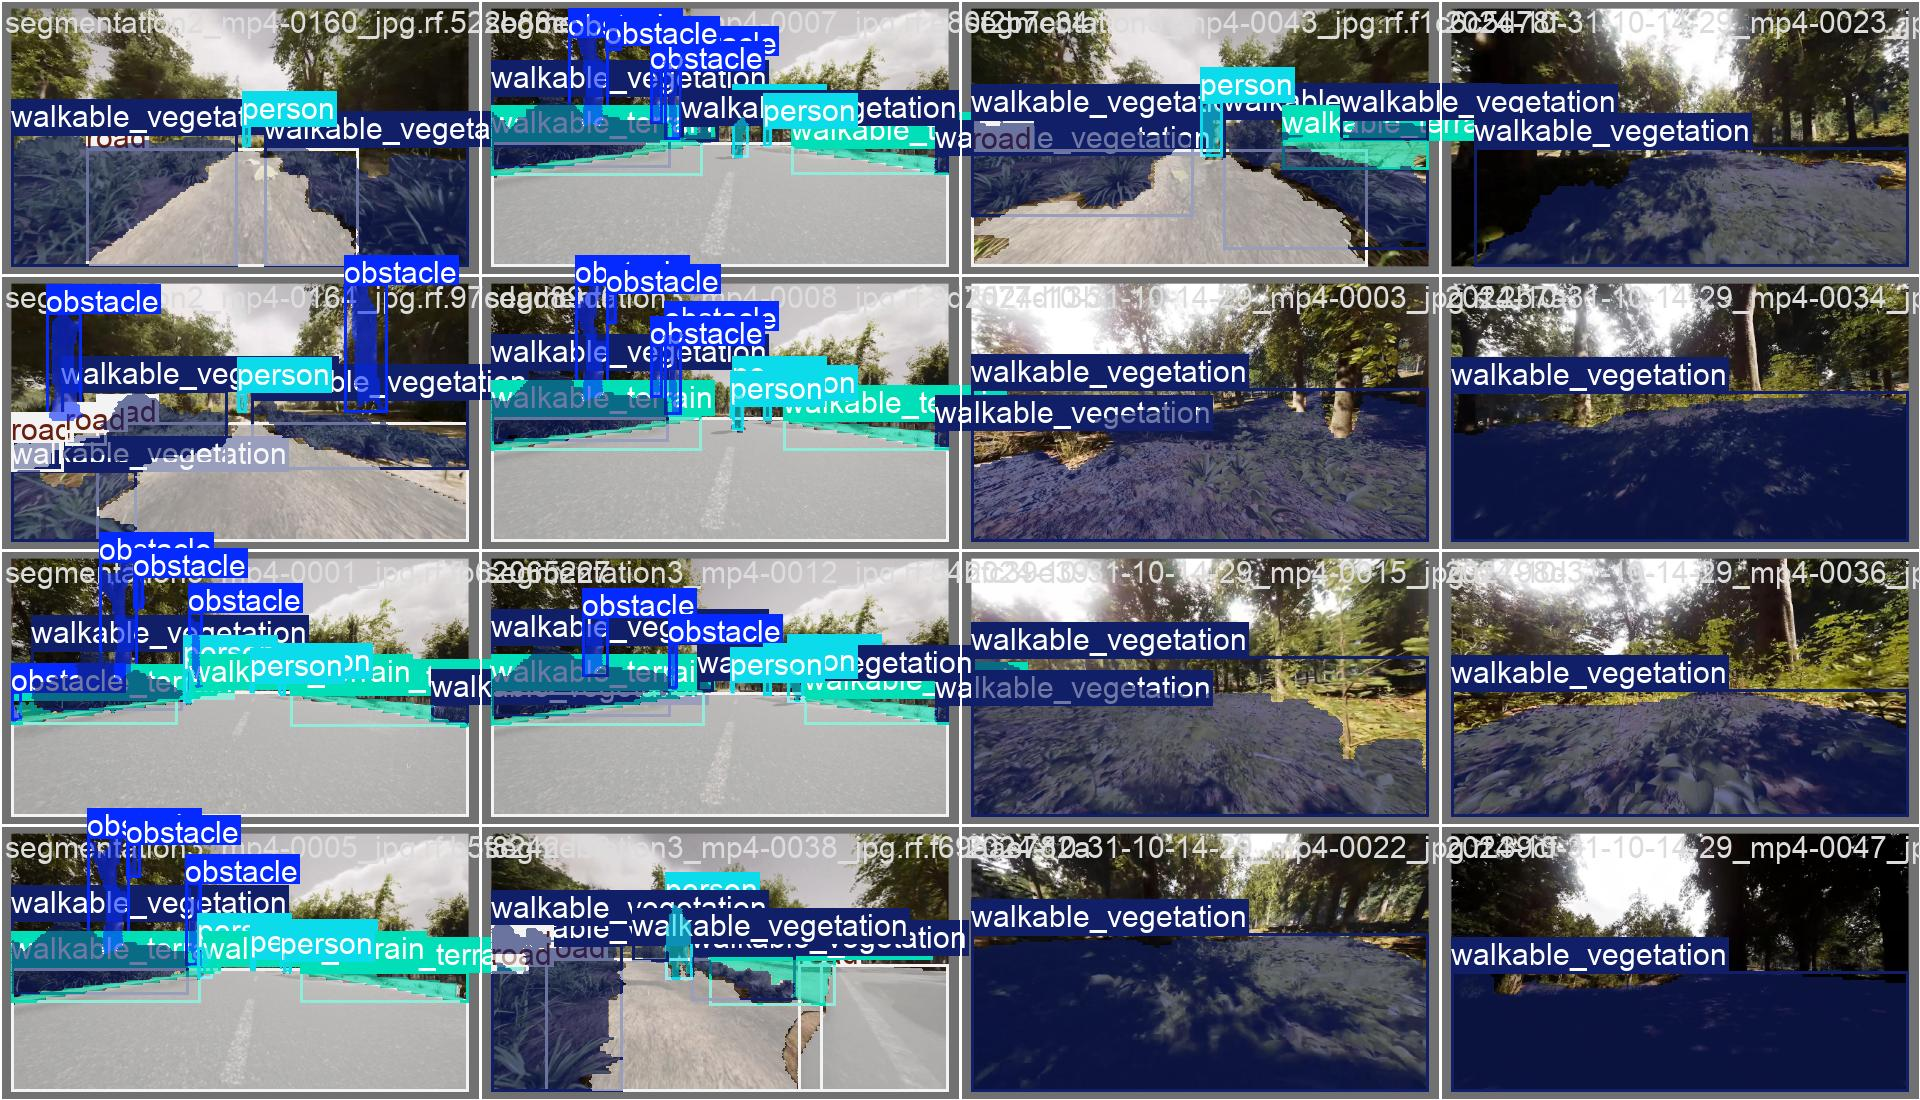

In [13]:
display(Image(filename=f"/kaggle/working/runs/segment/train2/val_batch0_labels.jpg", width=1000))

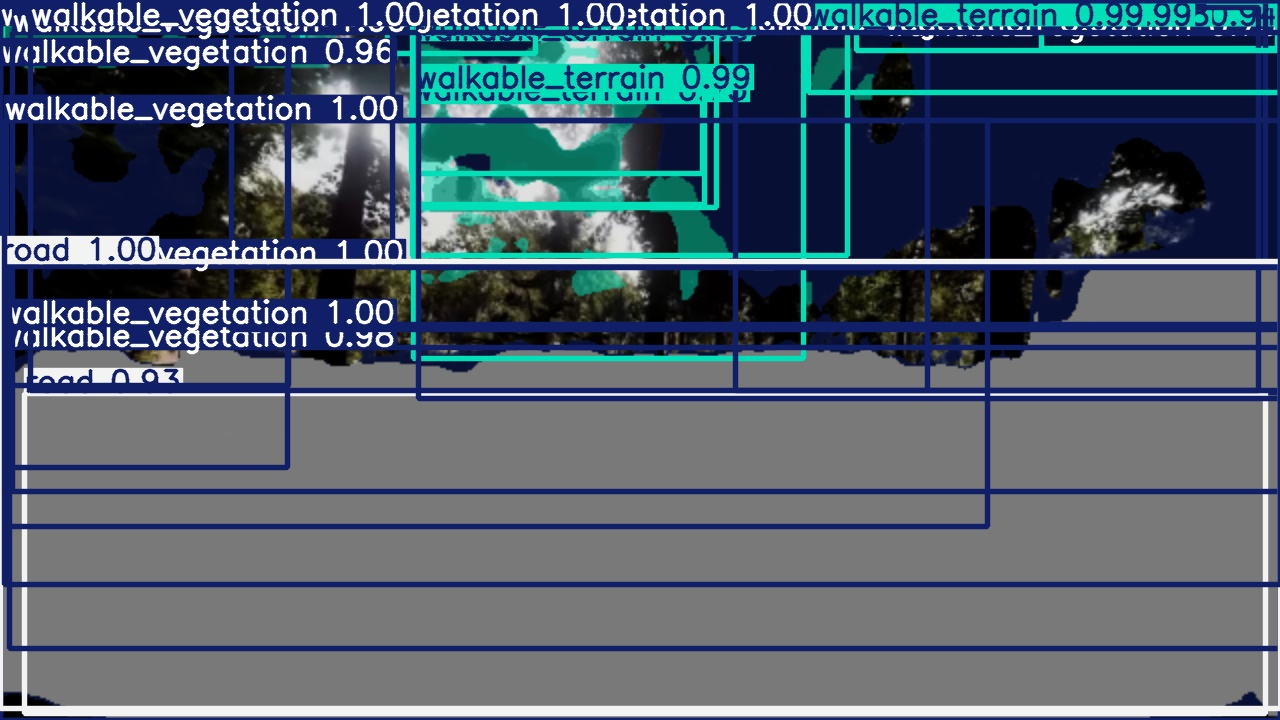

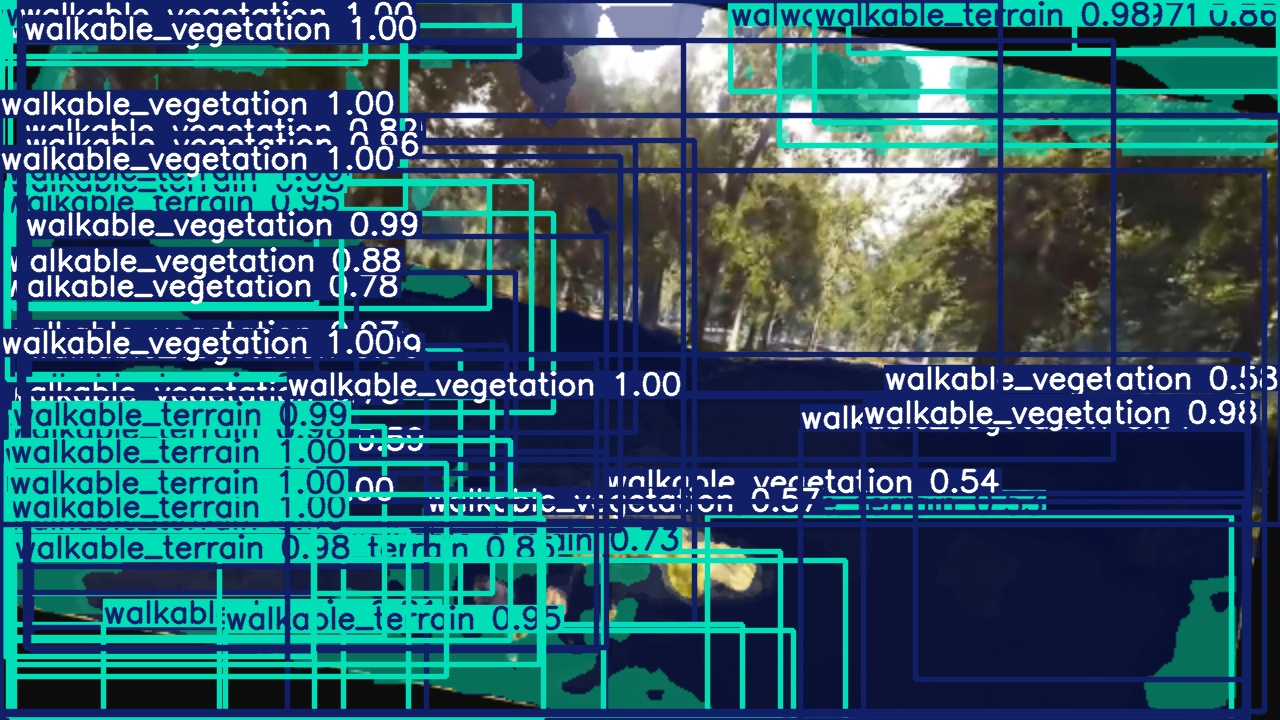

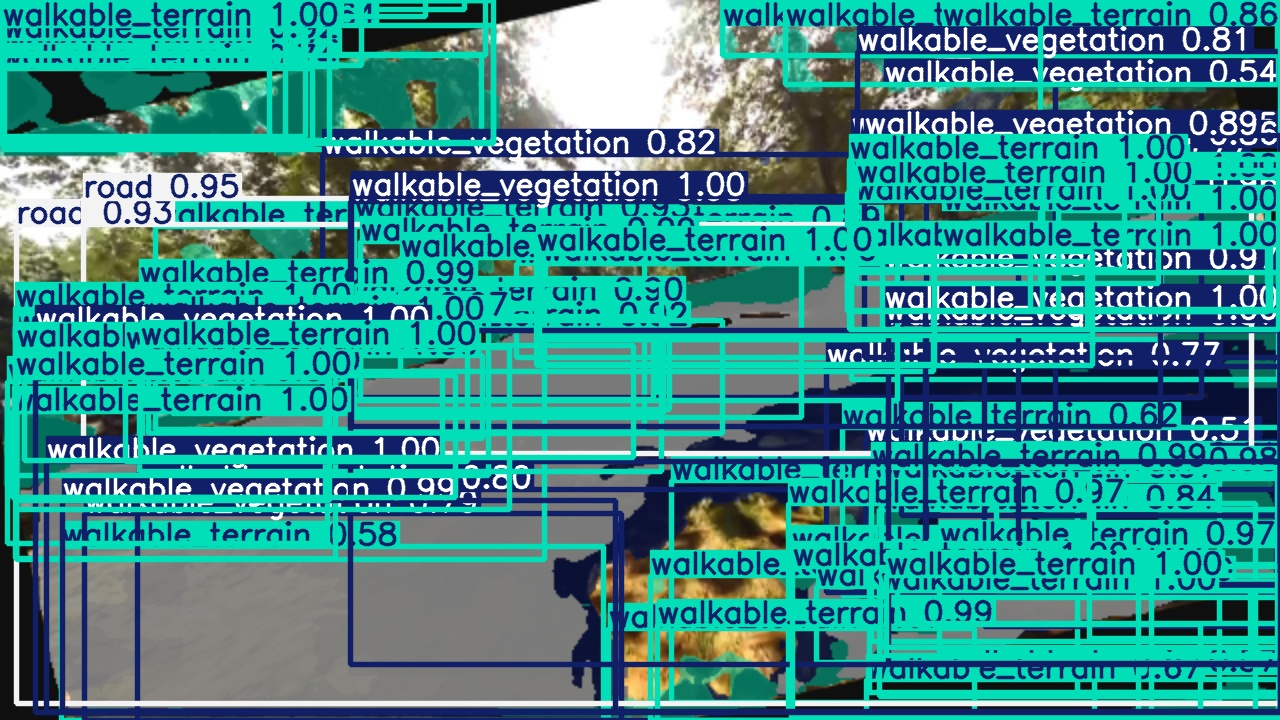

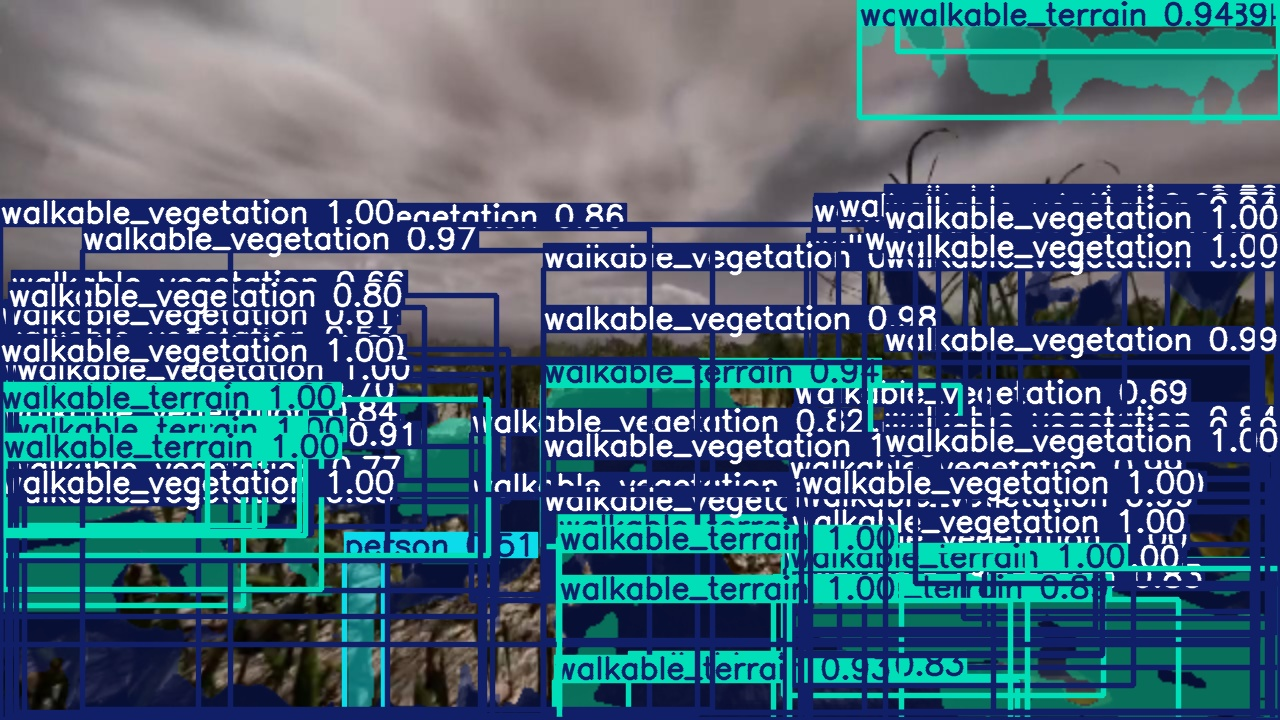

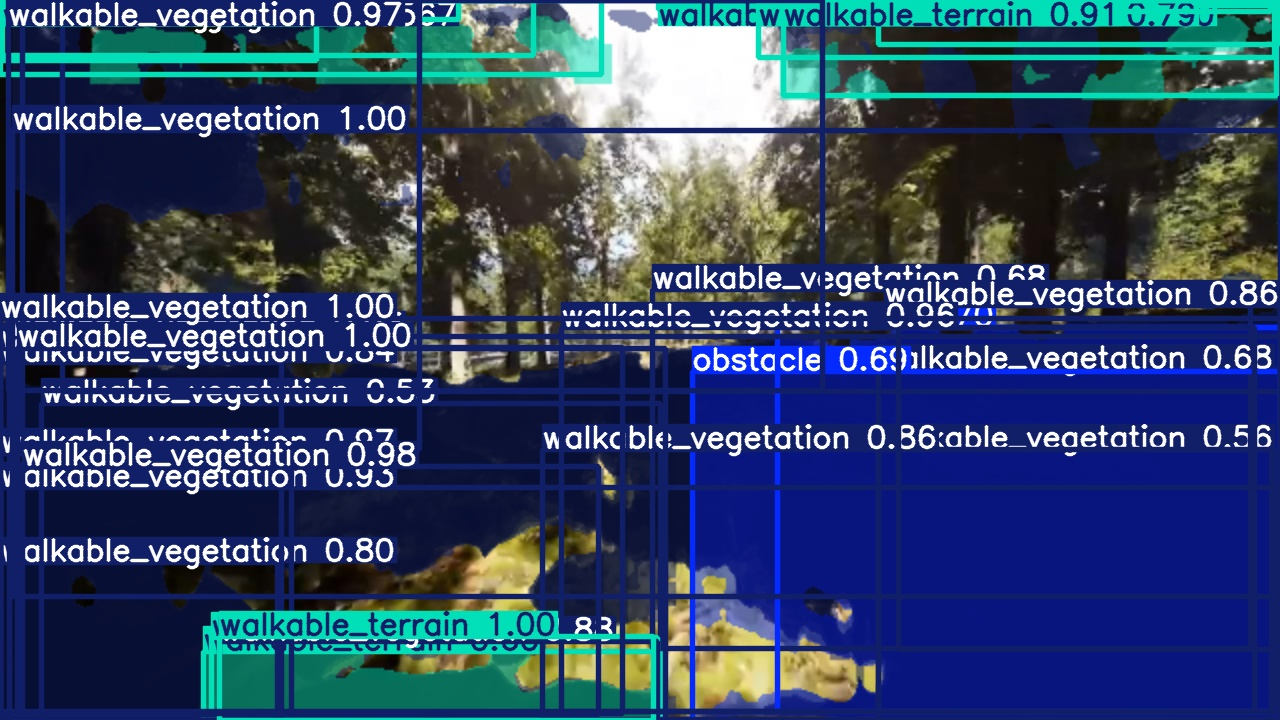

In [14]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob("/kaggle/working/runs/segment/predict/*.jpg")[:5]: #assuming JPG

    print("\n")
    display(Image(filename=imageName))